# Team performance over the years ( according to FPL data)

## Imports

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# data for season 16-17
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2016-17/cleaned_players.csv'
data_16 = pd.read_csv(url, encoding = 'latin-1')

In [3]:
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2016-17/players_raw.csv'
data_raw_16 = pd.read_csv(url, encoding = 'latin-1')

In [4]:
# Data for 17-18
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2017-18/cleaned_players.csv'
data_17 = pd.read_csv(url, error_bad_lines = False)

In [5]:

url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2017-18/players_raw.csv'
data_raw_17 = pd.read_csv(url, error_bad_lines = False)

In [6]:
# Data for 18-19
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/cleaned_players.csv'
data_18 = pd.read_csv(url)

In [7]:
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/players_raw.csv'
data_raw_18 = pd.read_csv(url)

In [8]:
# Data for 19-20
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/cleaned_players.csv'
data_19 = pd.read_csv(url, error_bad_lines = False)

In [9]:
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/players_raw.csv'
data_raw_19 = pd.read_csv(url)

## Data cleaning 

In [10]:
# Making a custom dataframe combining two dataframes from each season 

data_16 = pd.concat([data_16, data_raw_16[['element_type','web_name', 'team']]], axis =1)
data_17 = pd.concat([data_17, data_raw_17[['element_type','web_name', 'team']]], axis =1)
data_18 = pd.concat([data_18, data_raw_18[['element_type','web_name', 'team']]], axis =1)
data_19 = pd.concat([data_19, data_raw_19[['element_type','web_name', 'team']]], axis =1)


In [11]:
# Selecting data for the team of your choice
# Equating the 'team' code with the dataset to select rows for that team only for each season. 

j = data_16[data_16['team'] == 9]   
df_16 = j[['total_points', 'web_name']] 

k = data_17[data_17['team'] == 10]
df_17 = k[['total_points', 'web_name']] 

l = data_18[data_18['team'] == 12]
df_18 = l[['total_points', 'web_name']] 

m = data_19[data_19['team'] == 10]
df_19 = m[['total_points', 'web_name']] 

In [12]:
# Rename the columns for convenience and better understanding. 

df_16 = df_16.rename({'total_points':'season_16-17'}, axis =1)

df_17 = df_17.rename({'total_points':'season_17-18'}, axis =1)

df_18 = df_18.rename({'total_points':'season_18-19'}, axis =1)

df_19 = df_19.rename({'total_points':'season_19-20'}, axis =1)


In [13]:
# setting the index as 'web name ' of each players in the data for each season.
df_16 = df_16.set_index(['web_name'])
df_17 = df_17.set_index(['web_name'])
df_18 = df_18.set_index(['web_name'])
df_19 = df_19.set_index(['web_name'])

In [14]:
# Now, the next step is to merge the dataset for all seasons 

m_16_17 = pd.merge(df_16,df_17, how = 'outer', on = 'web_name') # Merging the (16-17)th & (17-18)th season
m_16_17_18 = pd.merge(m_16_17,df_18, how = 'outer', on = 'web_name') # Merging the (18-19)th season with the last one
df_merged = pd.merge(m_16_17_18, df_19, how = 'outer', on = 'web_name') # Finally adding the (19-20)th season into the last one


In [15]:
# Remove all the players with 0 points in any of the seasons

df_merged.replace({ 0.0 : np.NaN }, inplace = True) 
df_team = df_merged.dropna()


In [16]:
df_team        # This is the dataframe of the team of your choice with fpl points for all 4 seasons 

,season_16-17,season_17-18,season_18-19,season_19-20
web_name,,,,
Lovren,106.0,110.0,63.0,18.0
Matip,97.0,81.0,83.0,39.0
Henderson,73.0,75.0,76.0,116.0
Lallana,139.0,13.0,23.0,27.0
Milner,139.0,77.0,101.0,49.0
Firmino,180.0,181.0,160.0,155.0
Origi,96.0,1.0,32.0,65.0
Wijnaldum,149.0,85.0,108.0,107.0
Alexander-Arnold,8.0,83.0,185.0,210.0


In [17]:
# Since the players who are relatively new to the club may have '0' points for previous seasons 
# But we all want the data for the players who are new to the club and don't want to loose that precious data.

# Here what is done is- 
#For all the players who have null values in them but FOR THE LST TWO SEASONS THEY HAVE NOT NULL VALUES, THEY ARE INCLUED.

index = df_merged.index
condition =(df_merged['season_18-19'].notnull()) & (df_merged['season_19-20'].notnull()) # the condition to include players.
c = index[condition]
List = c.to_list()



In [18]:
old = df_team.index  # the ones with some value(points) in all 4 seasons.  

In [19]:
# Creatre a function to identify who are the new players who have to be added

# This is the done by finding the new items in the two lists - one for new_players and another where we remove all players
# with null values in them. 
def list_diff(list1, list2):
    out = []
    for ele in list1:
        if not ele in list2:
            out.append(ele)
    return out

In [21]:
new_ones  = list_diff(List ,old)
new_ones

['Gomez',
 'Chamberlain',
 'Mané',
 'Salah',
 'van Dijk',
 'Robertson',
 'Fabinho',
 'Keita',
 'Shaqiri',
 'Alisson']

In [23]:
# Now add the new players' data in the df_team dataframe 

df_final = df_team.append(df_merged.loc[new_ones,:]) # This is our final data frame. 

# Here we have completed the most tedious part of the analysis


In [24]:
df_final

,season_16-17,season_17-18,season_18-19,season_19-20
web_name,,,,
Lovren,106.0,110.0,63.0,18.0
Matip,97.0,81.0,83.0,39.0
Henderson,73.0,75.0,76.0,116.0
Lallana,139.0,13.0,23.0,27.0
Milner,139.0,77.0,101.0,49.0
Firmino,180.0,181.0,160.0,155.0
Origi,96.0,1.0,32.0,65.0
Wijnaldum,149.0,85.0,108.0,107.0
Alexander-Arnold,8.0,83.0,185.0,210.0


### Grouping

In [25]:
# To find the performance graph of each player, it is easier to group their data separetly
# We do this grouping by their web name 

separate = df_final.groupby('web_name')
g =[]
h =[]
for i, group in separate:
    h.append(i)
    g.append(group.T)

In [26]:
len(g)  # No of player groups 

19

In [27]:
# We have to rename the columns after grouping for our own better understanding 

for i in range(len(g)):
    g[i].columns= ['points']
    g[i].index.name = 'year'
for i in range(len(g)):
    g[i] = g[i].reset_index()  

## Visualization

### It's show time 

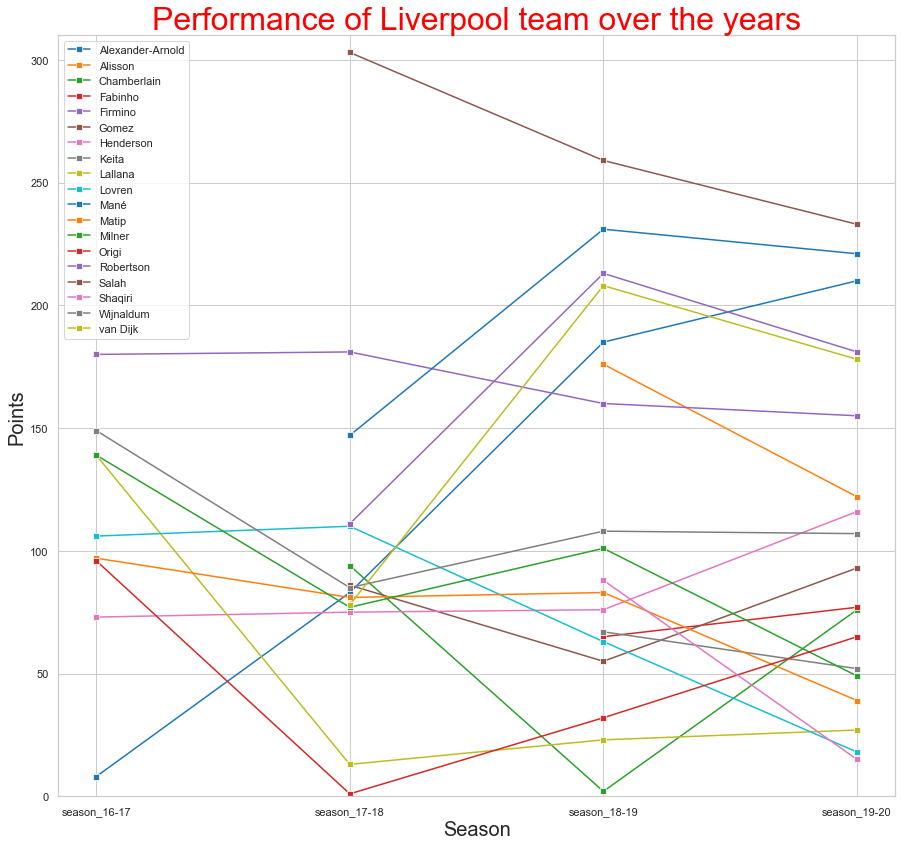

In [29]:
fig, ax = plt.subplots()
for i in range(len(g)):
    sns.lineplot( g[i]['year'], g[i]['points'], data= g[i], label = h[i], marker = 's', palette = "paired")
    sns.set_style("whitegrid")
    sns.set_context("notebook")
plt.ylim(0,310)
plt.gcf().set_size_inches(15, 14)
plt.title("Performance of Liverpool team over the years", fontsize=32, fontweight=0, color='red')
plt.xlabel("Season", fontsize= 20)
plt.ylabel("Points", fontsize= 20)
plt.show()

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y']+.02, str(point['val']))

label_point(g[i].year, g[i].points, h[i], plt.gca())  